# Imports

In [31]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np

In [2]:
image_size = 256
batch_size = 32
channels = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
          "PlantVillage",
          shuffle = True,
          batch_size = batch_size,
          image_size = (image_size,image_size)
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)

(32, 256, 256, 3)


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 1 1 1 1 1 0 1 2 1 0 1 0 0 0 1 2 0 0 1 1 1 0 1 1 1 0 0]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[190. 184. 186.]
  [187. 181. 183.]
  [185. 179. 181.]
  ...
  [204. 198. 200.]
  [206. 200. 202.]
  [208. 202. 204.]]

 [[186. 180. 182.]
  [184. 178. 180.]
  [183. 177. 179.]
  ...
  [204. 198. 200.]
  [206. 200. 202.]
  [207. 201. 203.]]

 [[185. 179. 181.]
  [183. 177. 179.]
  [182. 176. 178.]
  ...
  [203. 197. 199.]
  [204. 198. 200.]
  [205. 199. 201.]]

 ...

 [[123. 114. 117.]
  [144. 135. 138.]
  [139. 130. 133.]
  ...
  [152. 143. 148.]
  [163. 154. 159.]
  [172. 163. 168.]]

 [[138. 129. 132.]
  [141. 132. 135.]
  [143. 134. 137.]
  ...
  [164. 155. 160.]
  [140. 131. 136.]
  [125. 116. 121.]]

 [[158. 149. 152.]
  [132. 123. 126.]
  [138. 129. 132.]
  ...
  [140. 131. 136.]
  [148. 139. 144.]
  [157. 148. 153.]]]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)  

(256, 256, 3)


# Data Visualization

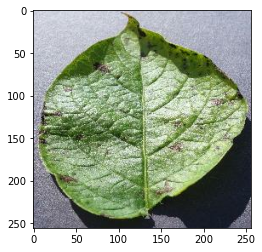

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

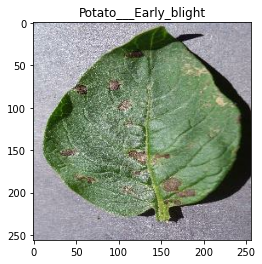

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

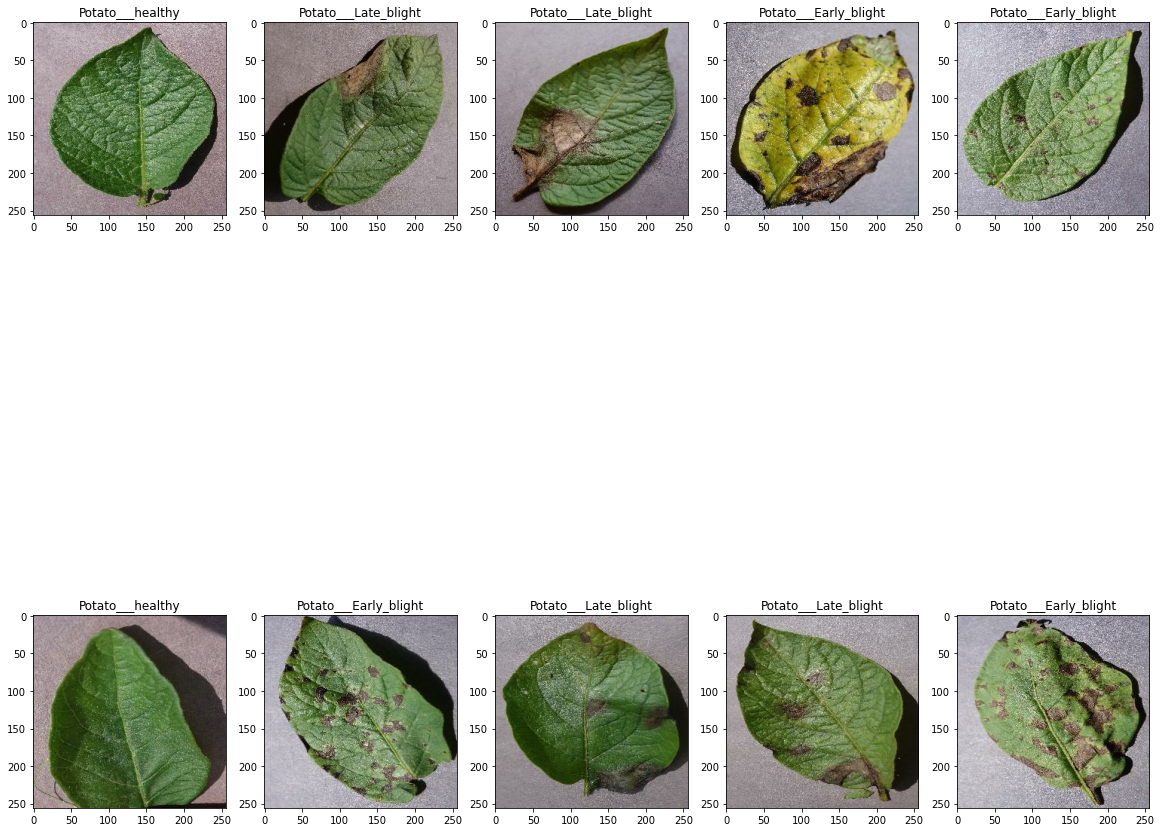

In [12]:
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        axis = plt.subplot(2,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])

# Train Test Split

In [13]:
def split_the_data(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=20)
        
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = split_the_data(dataset)

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Data Augmentation

In [16]:
resize_or_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size,image_size),
    layers.experimental.preprocessing.Rescaling(0.1/255)
])

In [17]:
data_augmen_layer = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

# Build & Train CNN Model

In [18]:
input_shape = (batch_size, image_size, image_size, channels)
#kerner_size = (3,3)
model = models.Sequential([
    resize_or_rescale,
    data_augmen_layer,
    
    layers.Conv2D(32, kernel_size = (3,3), padding = "valid", activation="relu", input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), padding = "valid", activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), padding = "valid", activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), padding = "valid", activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), padding = "valid", activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), padding = "valid", activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
])

model.build(input_shape=input_shape)

In [19]:
# input_shape = (batch_size, image_size, image_size, channels)
# model=sequential()

# model.add(resize_or_rescale)

# model.add(data_augmen_layer)

# model.add(Conv2D(32,kernel_size=(3,3), activation="relu", input_shape=input_shape)))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,kernel_size=(3,3), activation="relu")))
# model.add(MaxPooling2D(pool_size=(2,2))) 
          
# model.add(Conv2D(64,kernel_size=(3,3), activation="relu")))
# model.add(MaxPooling2D(pool_size=(2,2))) 
          
# model.add(Conv2D(64,kernel_size=(3,3), activation="relu")))
# model.add(MaxPooling2D(pool_size=(2,2))) 
          
# model.add(Conv2D(64,kernel_size=(3,3), activation="relu")))
# model.add(MaxPooling2D(pool_size=(2,2))) 
          
# model.add(Conv2D(64,kernel_size=(3,3), activation="relu")))
# model.add(MaxPooling2D(pool_size=(2,2)))
          
# model.add(Flatten())
          
# model.add(Dense(64,activation="relu"))
# model.add(Dense(3, activation="softmax"))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [21]:
model.compile(optimizer = "adam", loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = "accuracy")

In [22]:
history = model.fit(train_ds, epochs = 50, batch_size = batch_size, verbose = 1, validation_data = val_ds)

Epoch 1/50
54/54 [==============================] - 520s 9s/step - loss: 0.9211 - accuracy: 0.4508 - val_loss: 0.9094 - val_accuracy: 0.5052
Epoch 2/50
54/54 [==============================] - 1027s 19s/step - loss: 0.7489 - accuracy: 0.6817 - val_loss: 0.6384 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 628s 12s/step - loss: 0.5722 - accuracy: 0.7708 - val_loss: 0.5413 - val_accuracy: 0.7969
Epoch 4/50
54/54 [==============================] - 393s 7s/step - loss: 0.4593 - accuracy: 0.8194 - val_loss: 0.5464 - val_accuracy: 0.7812
Epoch 5/50
54/54 [==============================] - 442s 8s/step - loss: 0.4937 - accuracy: 0.8067 - val_loss: 0.5072 - val_accuracy: 0.8229
Epoch 6/50
54/54 [==============================] - 460s 9s/step - loss: 0.4387 - accuracy: 0.8183 - val_loss: 0.8841 - val_accuracy: 0.6458
Epoch 7/50
54/54 [==============================] - 444s 8s/step - loss: 0.3848 - accuracy: 0.8490 - val_loss: 0.5925 - val_accuracy: 0.7604
Epoch 8/50

In [23]:
scores = model.evaluate(test_ds)

6/6 [==============================] - 64s 2s/step - loss: 0.0750 - accuracy: 0.9792


In [24]:
scores

[0.075031578540802, 0.9791666865348816]

In [27]:
accu = history.history["accuracy"]
val_accu = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Testing & Predicting 

first image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label: Potato___Late_blight


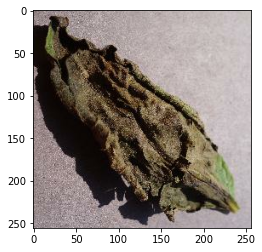

In [40]:
for image_batch, label_batch in test_ds.take(1):
    first_img = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_img)
    print("Actual Label:",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [68]:
def predicted(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 109ms/step


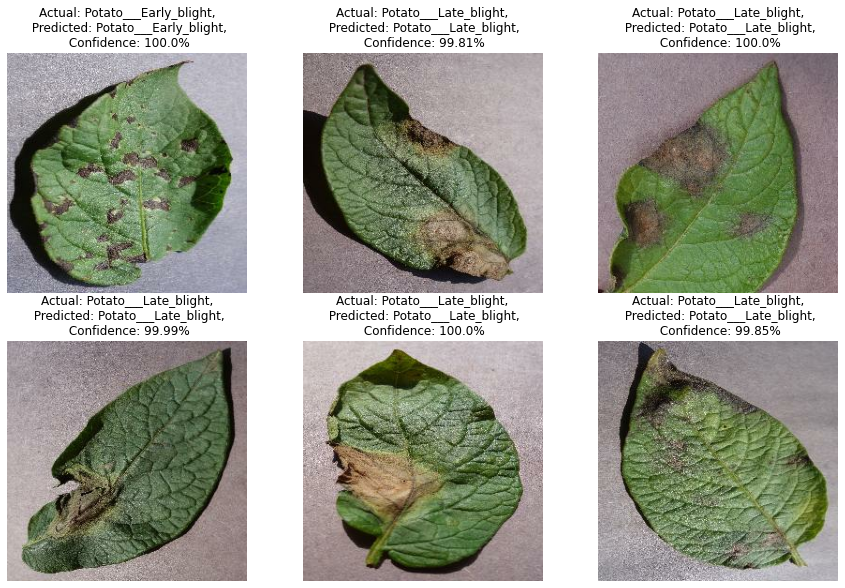

In [70]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predicted(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        plt.axis("off")

# Export model to file

In [74]:
model_num = 1
model.save(f"../Model/{model_num}")

INFO:tensorflow:Assets written to: ../Model/1\assets


INFO:tensorflow:Assets written to: ../Model/1\assets
